In [3]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read the csv file
data=pd.read_csv('StudentsPerformance.csv')

In [5]:
data.shape

(1000, 8)

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#check for any missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
#Create total_score variable by adding 3 different subjects
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
#Create percentage variable from total_score
data['percentage'] = data['total_score']/3

Let's keep 36 as the minimum score to pass a subject

In [11]:
#Create results variable with minimum score
data['result']=[0 if data['math score'][x]<36 or data['reading score'][x]<36 or data['writing score'][x]<36 else 1 for x in range(len(data))]

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,1
4,male,group C,some college,standard,none,76,78,75,229,76.333333,1


# Let's plot graphs to explore data

# Students performance in exmams

In [13]:
def getCount(code):
    i=0
    if code == 'a_80':
        for c in data['percentage']:
            if c>=80:
                i+=1
    elif code == 'b_70_80':
        for c in data['percentage']:
            if c>=70 and c<80:
                i+=1
    elif code == 'b_60_70':
        for c in data['percentage']:
            if c>=60 and c<70:
                i+=1
    elif code == 'b_60':
        for c in data['percentage']:
            if c<60:
                i+=1
    return i

a_80 = getCount('a_80')/1000
b_70_80 = getCount('b_70_80')/1000
b_60_70 = getCount('b_60_70')/1000
b_60 = getCount('b_60')/1000

print(a_80*100)
print(b_70_80*100)
print(b_60_70*100)
print(b_60*100)

19.8
26.1
25.6
28.499999999999996


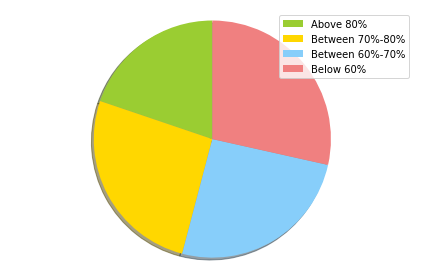

In [14]:
labels = ['Above 80%', 'Between 70%-80%', 'Between 60%-70%', 'Below 60%']
sizes = [a_80*100, b_70_80*100, b_60_70*100, b_60*100]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Female and Male students performance in exmams

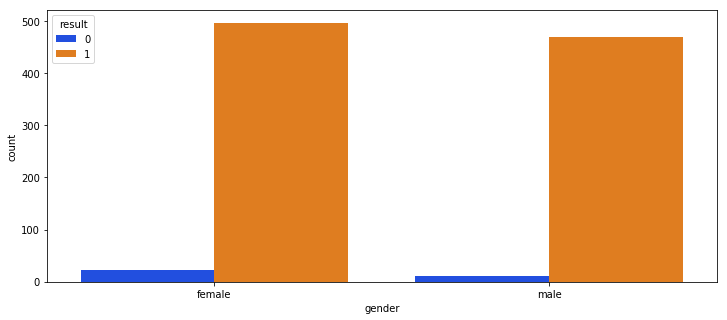

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='gender', data = data, hue='result', palette='bright')

# Students performence with respect to thier race/ethnicity

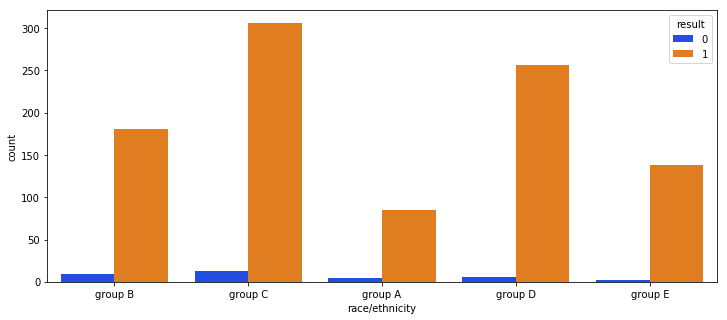

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='race/ethnicity', data = data, hue='result', palette='bright')

# Students performence with respect to thier parental level of education

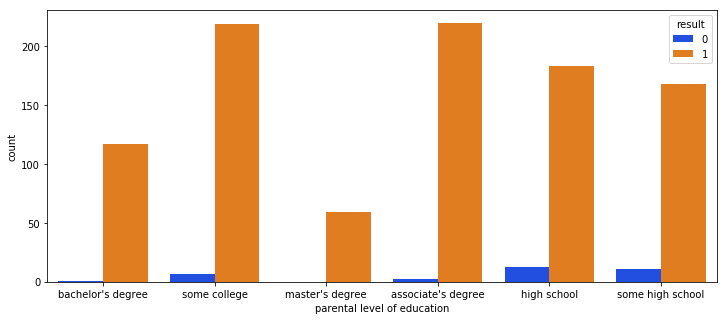

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='parental level of education', data = data, hue='result', palette='bright')

# Students performence with respect to thier test preparation course

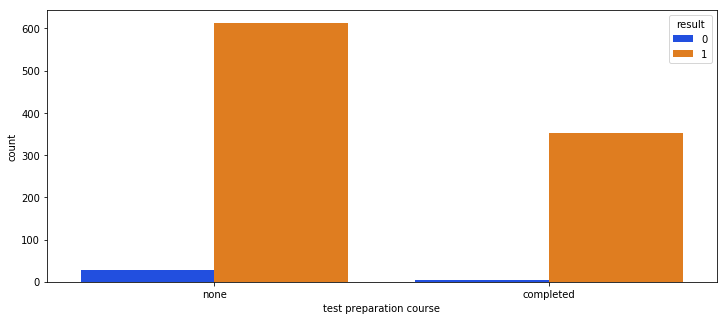

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='test preparation course', data = data, hue='result', palette='bright')

# Students performence with respect to thier lunch

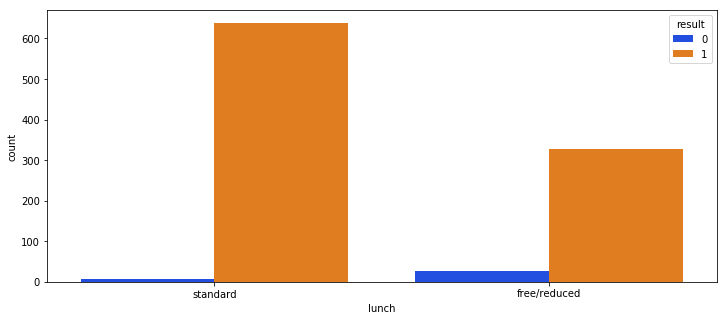

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='lunch', data = data, hue='result', palette='bright')

# The correlation of how students performs in different subjects

In [20]:
corr = data.corr()
corr

,math score,reading score,writing score,total_score,percentage,result
math score,1.000000,0.817580,0.802642,0.918746,0.918746,0.438367
reading score,0.817580,1.000000,0.954598,0.970331,0.970331,0.413568
writing score,0.802642,0.954598,1.000000,0.965667,0.965667,0.413380
total_score,0.918746,0.970331,0.965667,1.000000,1.000000,0.443439
percentage,0.918746,0.970331,0.965667,1.000000,1.000000,0.443439
result,0.438367,0.413568,0.413380,0.443439,0.443439,1.000000


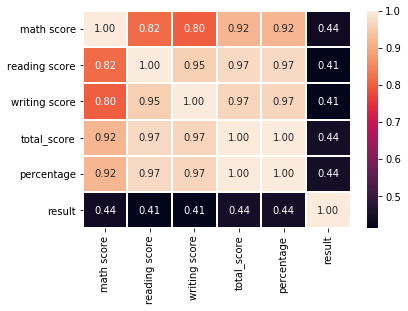

In [21]:
sns.heatmap(data.corr(),annot=True,linewidths=1,fmt=".2f")
plt.show()

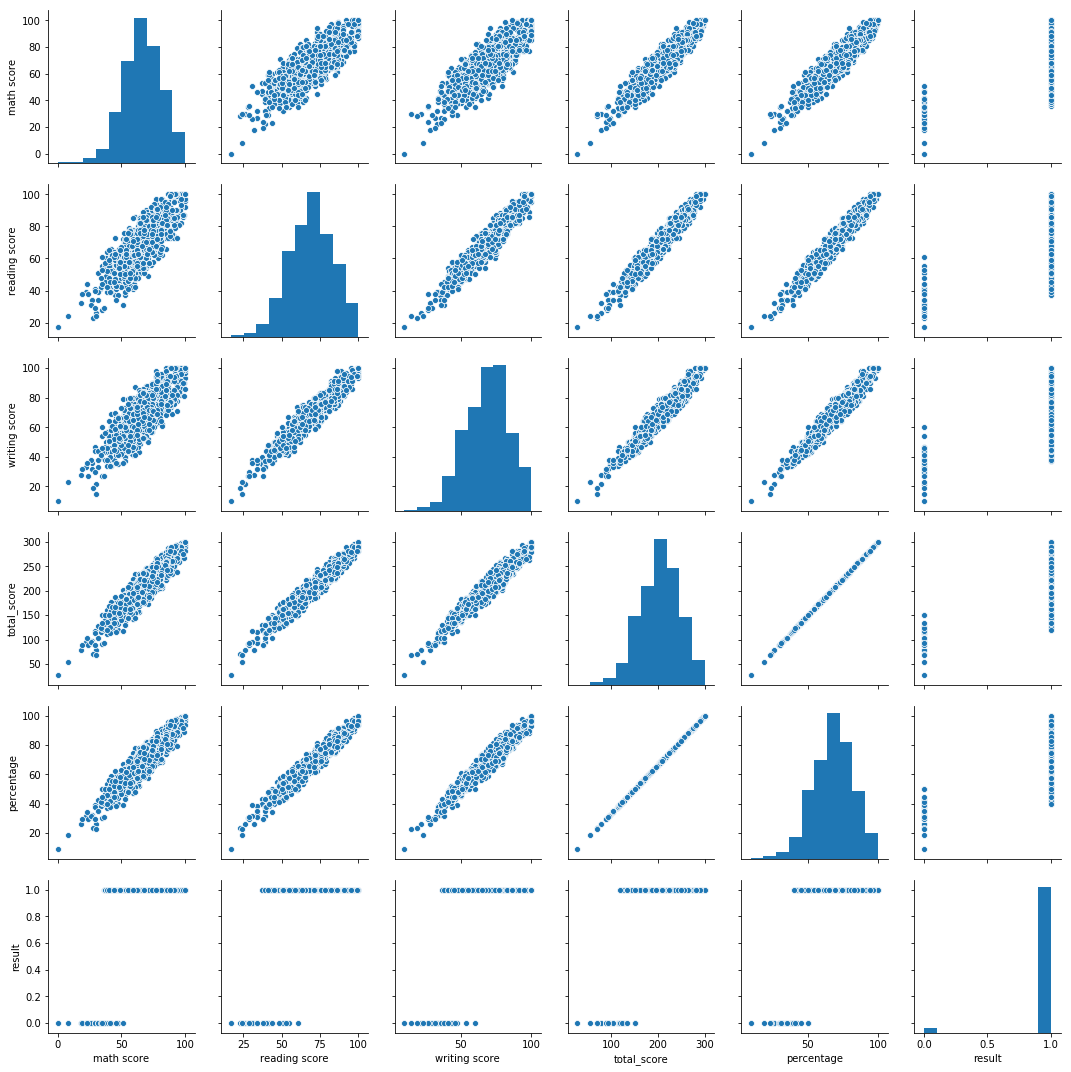

In [22]:
sns.pairplot(data)

In [23]:
table = data.sort_values(by=['total_score'],ascending=False)
table

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,result
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000,1
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,1
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000,1
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,1
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000,1
712,female,group D,some college,standard,none,98,100,99,297,99.000000,1
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,1
625,male,group D,some college,standard,completed,100,97,99,296,98.666667,1
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667,1
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667,1


In [24]:
table = pd.pivot_table(data,index = ['gender','test preparation course','race/ethnicity','parental level of education'])
table

math score  \
gender test preparation course race/ethnicity parental level of education               
female completed               group A        associate's degree            60.000000   
                                              high school                   61.400000   
                                              some college                  75.000000   
                                              some high school              78.666667   
                               group B        associate's degree            71.428571   
                                              bachelor's degree             65.500000   
                                              high school                   61.222222   
                                              master's degree               62.333333   
                                              some college                  60.800000   
                                              some high school              57.666667   
                               group C        associate's degree            68.055556   
                                              bachelor's degree             66.000000   
                                              high school                   58.800000   
                                              master's degree               67.250000   
                                              some college                  68.312500   
                                              some high school              63.230769   
                               group D        associate's degree            67.875000   
                                              bachelor's degree             77.333333   
                                              high school                   64.500000   
                                              master's degree               68.000000   
                                              some college                  69.307692   
                                              some high school              64.111111   
                               group E        associate's degree            79.142857   
                                              bachelor's degree             85.250000   
                                              high school                   64.000000   
                                              master's degree               91.000000   
                                              some college                  67.500000   
                                              some high school              80.000000   
       none                    group A        associate's degree            56.250000   
                                              bachelor's degree             51.666667   
...                                                                               ...   
male   none                    group A        associate's degree            58.600000   
                                              bachelor's degree             72.000000   
                                              high school                   57.888889   
                                              master's degree               73.000000   
                                              some college                  56.600000   
                                              some high school              60.555556   
                               group B        associate's degree            67.363636   
                                              bachelor's degree             64.250000   
                                              high school                   58.000000   
                                              master's degree               49.000000   
                                              some college                  58.461538   
                                              some high school              69.500000   
                               group C        associate's degree      